## Supervised_Learning Project 

#### This project uses the most popular classification techniques to predict the outcomes after extensively working on EDA treating missing values and imbalanced data. This project has two parts. 
#### Part 1-Predicting the condition of the patient depending on the received test results on biomechanics features of the patients according to their current conditions. 
#### Part 2-Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical database.



### Part-1 

### 1.1 Data Understanding 

In [1]:
#importing useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter('ignore')

In [2]:
# Storing csv files in three separate variables df1, df2, df3 

df1=pd.read_csv("Normal.csv")
df2=pd.read_csv("Type_H.csv")
df3=pd.read_csv("Type_S.csv")


In [3]:
df1.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [4]:
df2.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [5]:
df3.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


#### 1B. Shape of all three dataframes

In [6]:
# printing shape of all three dataframes

print("Shape of df1 is: ", df1.shape)
print("Shape of df2 is: ", df2.shape)
print("Shape of df3 is: ", df3.shape)


Shape of df1 is:  (100, 7)
Shape of df2 is:  (60, 7)
Shape of df3 is:  (150, 7)


#### 1.C: Column names of dataframes

In [7]:
# printing column names of three dataframes 

print("\n")

a= pd.DataFrame(df1.columns, columns=['df1'])
b= pd.DataFrame(df2.columns, columns=['df2'])
c= pd.DataFrame(df3.columns, columns=['df3'])

df_columns= pd.concat([a,b,c], axis=1)
df_columns

,df1,df2,df3
0,P_incidence,P_incidence,P_incidence
1,P_tilt,P_tilt,P_tilt
2,L_angle,L_angle,L_angle
3,S_slope,S_slope,S_slope
4,P_radius,P_radius,P_radius
5,S_Degree,S_Degree,S_Degree
6,Class,Class,Class


### Conclusion: 

1. All the column names are same for three datframes df1, df2,df3


#### 1.D: Datatypes of dataframes

In [8]:
#DataTypes of all the 3 DataFrames

dict={'df1': df1.dtypes, 'df2': df2.dtypes, 'df3': df3.dtypes}
pd.DataFrame(dict)


,df1,df2,df3
P_incidence,float64,float64,float64
P_tilt,float64,float64,float64
L_angle,float64,float64,float64
S_slope,float64,float64,float64
P_radius,float64,float64,float64
S_Degree,float64,float64,float64
Class,object,object,object


#### 1.E: Variation in class feature

In [9]:
# variation in class feature 

print(" Class features in df1: ", df1['Class'].unique())
print(" Class features in df2: ", df2['Class'].unique())
print(" Class features in df3: ", df3['Class'].unique())

 Class features in df1:  ['Normal' 'Nrmal']
 Class features in df2:  ['Type_H' 'type_h']
 Class features in df3:  ['Type_S' 'tp_s']


### 1.2 Data Exploration and Preprocessing

#### 2.A

In [10]:
#  Unifying all variations in 'class' feature of the dataframes

df1['Class'].replace({'Nrmal':"Normal"}, inplace= True)

df2['Class'].replace({'Type_H':"type_h"}, inplace= True)

df3['Class'].replace({'Type_S':"type_s", "tp_s":"type_s"}, inplace= True)


In [11]:
df1['Class'].value_counts()

Normal    100
Name: Class, dtype: int64

In [12]:
df2['Class'].value_counts()

type_h    60
Name: Class, dtype: int64

In [13]:
df3['Class'].value_counts()

type_s    150
Name: Class, dtype: int64

#### 2.B:

In [14]:
# combining all the three dataframes into one
# concat function is used to combine dataframes

df= pd.concat([df1,df2,df3], axis=0)
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,type_s
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,type_s
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,type_s
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s


In [15]:
# resetting index of the new dataframe created

df.reset_index( inplace= True, drop=True)
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,type_s
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,type_s
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,type_s
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,type_s


In [16]:
# checking shape of new dataframe

df.shape

(310, 7)

In [17]:

# checking columns informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [18]:
#we convert class dtype from object to category
df['Class']=df['Class'].astype("category")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.1 KB


#### 2.C:

In [20]:
# 5 Random samples of the dataframe
 
for i in np.arange(1,6):
    sample= df.sample(n=np.random.randint(0,10))
    print(" Sample ", i, " is :\n")
    print(sample)
    print(" \n")


 Sample  1  is :

     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
41     40.746996   1.835524  50.000000  38.911472  139.247150   0.668557   
258    57.035097   0.345728  49.198003  56.689369  103.048698  52.165145   
207    78.425951  33.425951  76.277439  45.000000  138.554111  77.155172   
19     43.436451  10.095743  36.032224  33.340707  137.439694  -3.114451   
26     61.821627  13.597105  64.000000  48.224523  121.779803   1.296191   
70     50.086153  13.430044  34.457541  36.656108  119.134622   3.089484   

      Class  
41   Normal  
258  type_s  
207  type_s  
19   Normal  
26   Normal  
70   Normal  
 

 Sample  2  is :

     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
149    41.767732  17.899402  20.030886  23.868330  118.363389   2.062963   
168    72.076278  18.946176  51.000000  53.130102  114.213013   1.010041   
60     51.311771   8.875541  57.000000  42.436230  126.472258  -2.144044   
214    80.988074  36.84317

#### 2.D:

In [21]:
# checking null values in the new datframe

df.isnull().sum()


P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

#### Conclusion: There are no null values in the dataframe 

#### 2.E:

In [22]:
# five point summary of the new dataframe

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [23]:
# checking skewness of data

pd.DataFrame(df.skew())

,0
P_incidence,0.520440
P_tilt,0.676553
L_angle,0.599451
S_slope,0.792577
P_radius,-0.176835
S_Degree,4.317954


array([[<AxesSubplot:title={'center':'P_incidence'}>,
        <AxesSubplot:title={'center':'P_tilt'}>],
       [<AxesSubplot:title={'center':'L_angle'}>,
        <AxesSubplot:title={'center':'S_slope'}>],
       [<AxesSubplot:title={'center':'P_radius'}>,
        <AxesSubplot:title={'center':'S_Degree'}>]], dtype=object)

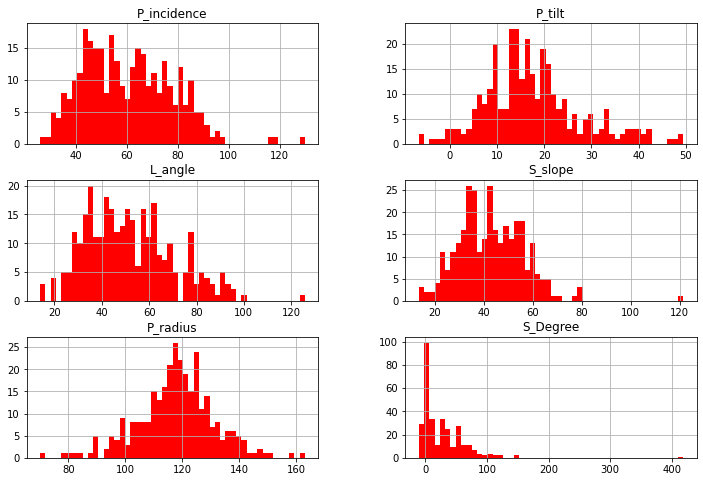

In [24]:
# We plot histogram of all the 6 columns and check the skewness of the data

df.hist(bins=50, figsize=(12,8), color='r',  )

### Conclusion from above data:
1. There is a huge difference between mean and 50%ile value in S_Degree column. It means data is 
   highly skewd. 
2. For other columns, there is less difference between mean and median values.
3. Outliers are present in most of the features. 

###  1.3 Data Analysis 

### 3.A:

<AxesSubplot:>

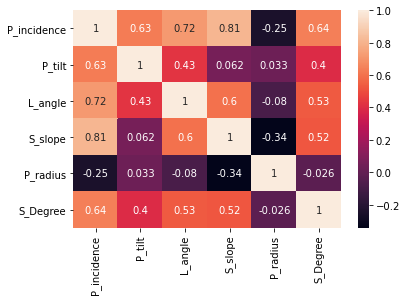

In [25]:
# Visualising heatmap for correlation between numerical columns

sns.heatmap(df.corr(), annot=True)

### 3.B:

### A. Features having stronger correlation:

    1. L_angle & P_incidence are stronly correlated with correlation value of 0.72
    2. S_slope & P_incidence are stronly correlated with correlation value of 0.81

<AxesSubplot:>

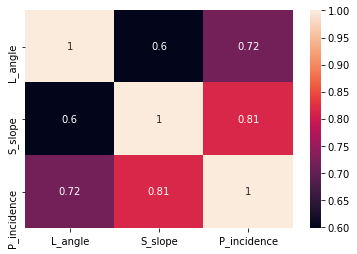

In [26]:
# we plot heatmap for stronger correlation features :

crr= df[['L_angle','S_slope', 'P_incidence']]
sns.heatmap(crr.corr(), annot=True)

### B. Features having weaker correlation:
    
    we are considering correlation values between -0.1 & 0.1 as the basis of weak correlation:
        
    1. **S_slope & P_tilt** are weakly correlated with correlation value of 0.062
    2. **P_radius & P_tilt** are weakly correlated with correlation value of 0.033
    3. **P_radius & L_angle** are weakly correlated with correlation value of -0.08
    4. **P_radius & S_degree** are weakly correlated with correlation value of -0.026
    

#### 3.C:

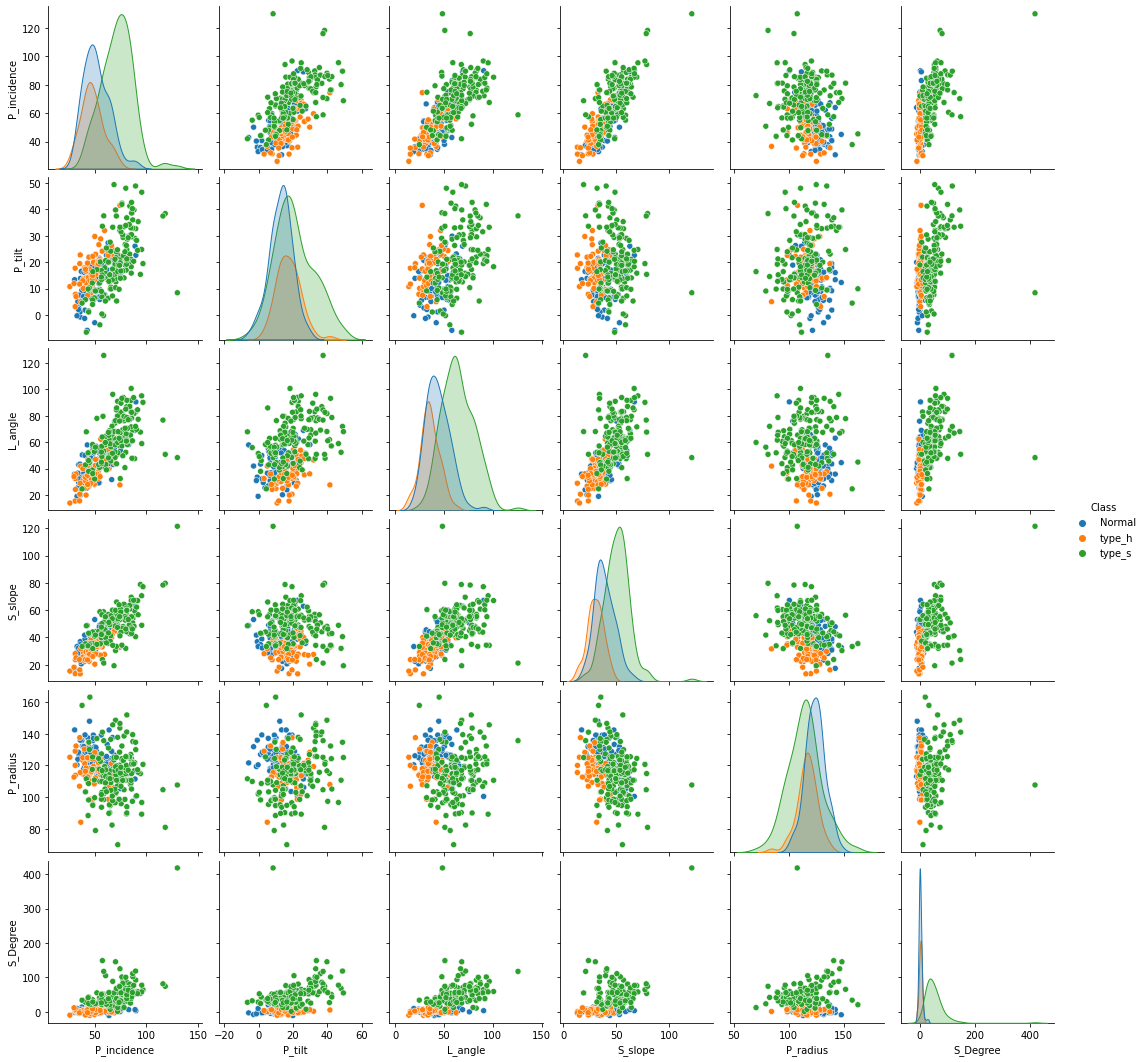

In [27]:
# Visualising pairplot for the dataframes for different classes

sns.pairplot(df, hue='Class', diag_kind='kde')

### Insights on Pairplot curve:

1. Normal and type_h class have same mean and they are difficult to segregate from each other
2. type_s class is more distinguished from the other two classes.
3. P_incidence and S_Degree feature column have well differentiated data for type_s class

#### 3.D:

<Figure size 1440x1440 with 0 Axes>

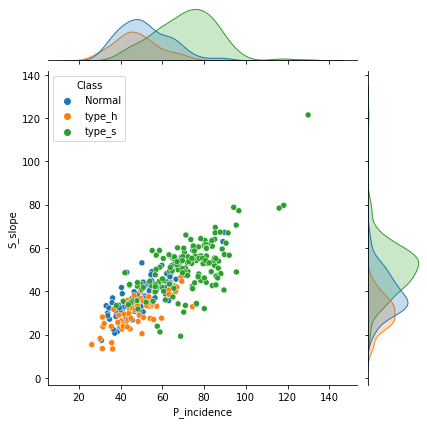

In [28]:
# Visualizing  a jointplot for ‘P_incidence’ and ‘S_slope’

plt.figure(figsize=[20,20])
sns.jointplot(x= df['P_incidence'], y= df['S_slope'],hue=df['Class'],  )


### Insights for jointplot:

1. There is a somewhat linear relation between the two features.
2. 'Normal' and 'type_h' class have same mean and they are difficult to separate. 
3. Outliers are present in type_s class
4. All the three class types follow normal distribution 


#### 3.E

#### Plotting boxplots for all 6 columns 

<AxesSubplot:>

<Figure size 720x1080 with 0 Axes>

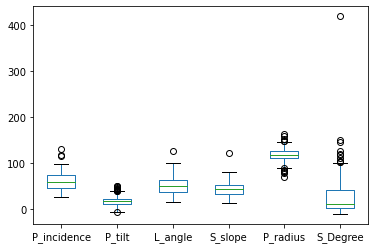

In [29]:
# Visualization of a boxplot to check distribution of the features of datframe df
plt.figure(figsize=[10,15])
df.plot.box()

<AxesSubplot:xlabel='Class', ylabel='P_incidence'>

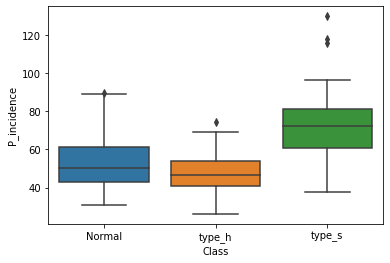

In [30]:
# Visualization of a boxplot to check distribution of the features of dataframe df

sns.boxplot(y=df['P_incidence'], x=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='P_tilt'>

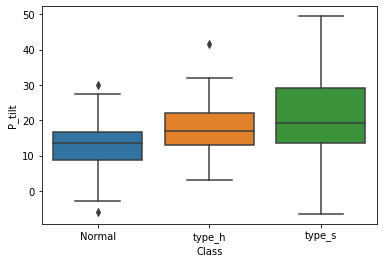

In [31]:

sns.boxplot(y=df['P_tilt'], x=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='P_radius'>

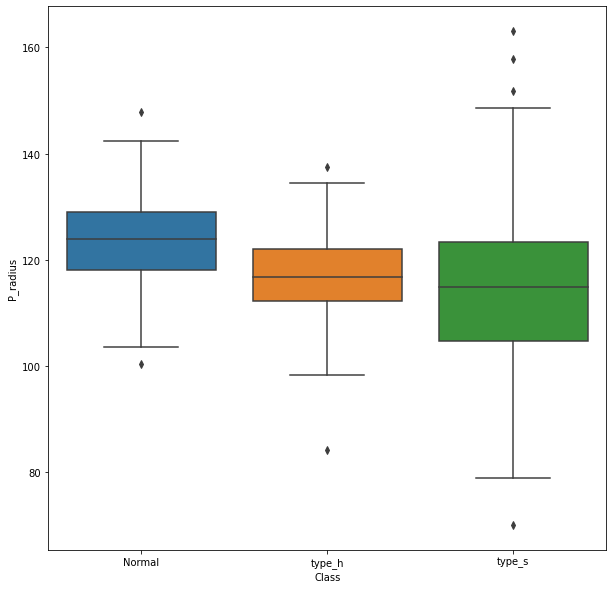

In [32]:
plt.figure(figsize=[10,10])
sns.boxplot(y=df['P_radius'], x=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='L_angle'>

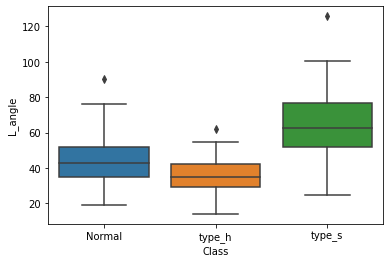

In [33]:
sns.boxplot(y=df['L_angle'],x=df['Class'] )

<AxesSubplot:xlabel='Class', ylabel='S_Degree'>

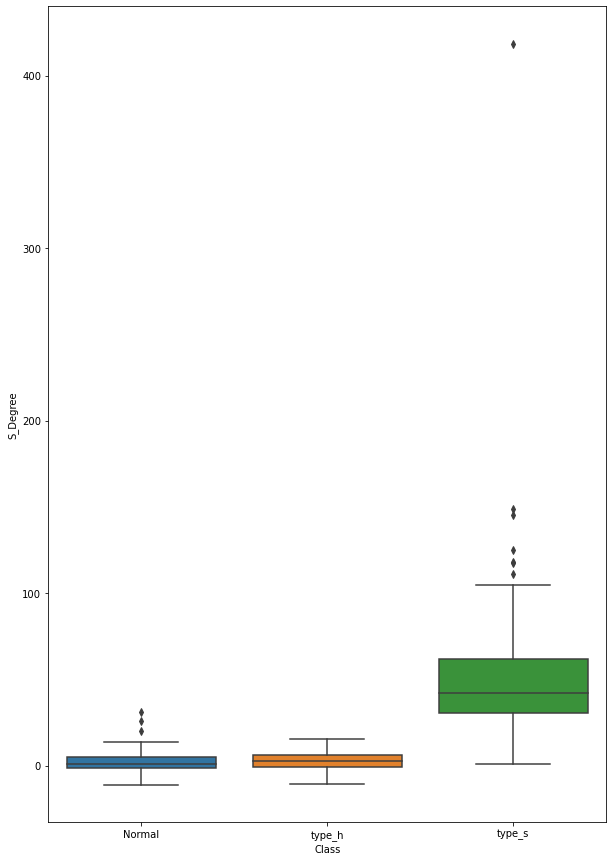

In [34]:
plt.figure(figsize=[10,15])
sns.boxplot(y=df['S_Degree'], x=df['Class'])

<AxesSubplot:xlabel='Class', ylabel='S_slope'>

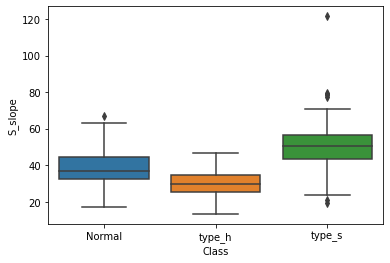

In [35]:
sns.boxplot(y=df['S_slope'], x=df['Class'])

### Insights by using boxplot:

1. There are a lot of outliers present in P_radius and S_Degree column
2. Most of the outliers for S_Degree column is in type_s class
3. Mean of type_s is more as compared to Normal and type_h classes except for 'P_Radius' feature.

### 4. Model Building

In [36]:
# splitting data into X and Y
# As class feature is categorical data, it is assumed as Y

X= df.drop('Class', axis=1)
y= df['Class']

In [37]:
# checking shape of X and y
X.shape

(310, 6)

In [38]:
y.shape

(310,)

In [39]:
# splitting data into train & test with 80:20 proportion

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [40]:
X_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
21,53.911054,12.939318,39.000000,40.971736,118.193035,5.074353
101,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
235,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607
45,67.538182,14.655042,58.001429,52.883139,123.632260,25.970206
89,82.905351,29.894119,58.250542,53.011232,110.708958,6.079338


In [41]:
X_test.shape

(62, 6)

In [42]:
y_train.head(10)

21     Normal
101    type_h
235    type_s
45     Normal
89     Normal
158    type_h
164    type_s
129    type_h
262    type_s
184    type_s
Name: Class, dtype: category
Categories (3, object): ['Normal', 'type_h', 'type_s']

In [43]:
y_test.tail(10)

246    type_s
179    type_s
209    type_s
5      Normal
63     Normal
200    type_s
59     Normal
34     Normal
269    type_s
33     Normal
Name: Class, dtype: category
Categories (3, object): ['Normal', 'type_h', 'type_s']

In [44]:
# now importing standard scaler function and KNN classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
sc= StandardScaler()
knn= KNeighborsClassifier(n_neighbors=3)

In [45]:
# now fitting the data with sc function
sc.fit(X_train)
Scaled_Xtrain= sc.transform(X_train)
Scaled_Xtest= sc.transform(X_test)
knn.fit(Scaled_Xtrain, y_train)

print("Training Accuracy is: ", knn.score(Scaled_Xtrain,y_train) )
print(" ")
print("Testing Accuracy is: ", knn.score(Scaled_Xtest,y_test))


Training Accuracy is:  0.8911290322580645
 
Testing Accuracy is:  0.7903225806451613


In [46]:
knn.predict(Scaled_Xtest)

array(['Normal', 'type_h', 'type_s', 'type_s', 'type_h', 'type_s',
       'type_h', 'type_s', 'type_s', 'type_s', 'type_h', 'type_h',
       'type_s', 'type_s', 'Normal', 'type_h', 'type_s', 'type_h',
       'type_s', 'type_s', 'Normal', 'type_s', 'Normal', 'type_h',
       'type_s', 'Normal', 'type_s', 'type_s', 'type_s', 'Normal',
       'type_h', 'type_h', 'type_s', 'Normal', 'type_h', 'type_h',
       'Normal', 'type_s', 'Normal', 'type_s', 'Normal', 'type_h',
       'type_s', 'Normal', 'type_s', 'Normal', 'type_s', 'Normal',
       'type_s', 'Normal', 'type_s', 'Normal', 'type_s', 'Normal',
       'type_s', 'Normal', 'Normal', 'Normal', 'Normal', 'type_h',
       'type_s', 'Normal'], dtype=object)

In [47]:
knn.predict_proba(Scaled_Xtest)

array([[0.66666667, 0.        , 0.33333333],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.33333333, 0.66666667, 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.

In [48]:
knn.predict(Scaled_Xtest)

array(['Normal', 'type_h', 'type_s', 'type_s', 'type_h', 'type_s',
       'type_h', 'type_s', 'type_s', 'type_s', 'type_h', 'type_h',
       'type_s', 'type_s', 'Normal', 'type_h', 'type_s', 'type_h',
       'type_s', 'type_s', 'Normal', 'type_s', 'Normal', 'type_h',
       'type_s', 'Normal', 'type_s', 'type_s', 'type_s', 'Normal',
       'type_h', 'type_h', 'type_s', 'Normal', 'type_h', 'type_h',
       'Normal', 'type_s', 'Normal', 'type_s', 'Normal', 'type_h',
       'type_s', 'Normal', 'type_s', 'Normal', 'type_s', 'Normal',
       'type_s', 'Normal', 'type_s', 'Normal', 'type_s', 'Normal',
       'type_s', 'Normal', 'Normal', 'Normal', 'Normal', 'type_h',
       'type_s', 'Normal'], dtype=object)

In [49]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score

In [50]:
from sklearn.metrics import classification_report

In [51]:
test_predicted = knn.predict(Scaled_Xtest)
train_predicted= knn.predict(Scaled_Xtrain)

In [52]:
# printing performance metrics for train data

print("Confusion matrix for training set is: \n")
print(confusion_matrix(y_train,train_predicted))
print(" ")
print("Classification report for training set is: \n")
print(classification_report(y_train,train_predicted))

Confusion matrix for training set is: 

[[ 66  10   1]
 [  8  40   1]
 [  4   3 115]]
 
Classification report for training set is: 

              precision    recall  f1-score   support

      Normal       0.85      0.86      0.85        77
      type_h       0.75      0.82      0.78        49
      type_s       0.98      0.94      0.96       122

    accuracy                           0.89       248
   macro avg       0.86      0.87      0.87       248
weighted avg       0.90      0.89      0.89       248



In [53]:
print("Training recall score is :\n")
print(recall_score(y_train,train_predicted,average="weighted"))
print(" ")
print("Training precision score is :\n")
print(precision_score(y_train,train_predicted,average="weighted"))
print(" ")
print("Training f1score score is :\n")
print(f1_score(y_train,train_predicted,average="weighted"))

Training recall score is :

0.8911290322580645
 
Training precision score is :

0.89536091993487
 
Training f1score score is :

0.8927879993467439


In [54]:
# Printing performance metrics for test data
print("Confusion matrix for testing set is: \n")
print(confusion_matrix(y_test,test_predicted))
print(" ")
print("Classification report for testing set is: \n")
print(classification_report(y_test,test_predicted))

Confusion matrix for testing set is: 

[[16  6  1]
 [ 2  8  1]
 [ 3  0 25]]
 
Classification report for testing set is: 

              precision    recall  f1-score   support

      Normal       0.76      0.70      0.73        23
      type_h       0.57      0.73      0.64        11
      type_s       0.93      0.89      0.91        28

    accuracy                           0.79        62
   macro avg       0.75      0.77      0.76        62
weighted avg       0.80      0.79      0.79        62



In [55]:
print("Testing recall score is :\n")
print(recall_score(y_test,test_predicted,average="weighted"))
print(" ")
print("Testing precision score is :\n")
print(precision_score(y_test,test_predicted,average="weighted"))
print(" ")
print("Testing f1score score is :\n")
print(f1_score(y_test,test_predicted,average="weighted"))

Testing recall score is :

0.7903225806451613
 
Testing precision score is :

0.802184673152415
 
Testing f1score score is :

0.7939002932551319


In [56]:
print(accuracy_score(y_test, test_predicted))

0.7903225806451613


### 5.A Performance Building 

In [57]:
# Finding better hyperparameters and best feature 
# finding optimal performance

from sklearn.model_selection import GridSearchCV


In [58]:
# listing hyperparameters to tune
# converting these to dictionary

hyperparameters= [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'p': [1,2]}]

# making model
clf= GridSearchCV(knn,hyperparameters, cv=10)
clf.fit(X_train, y_train)

#getting the required results 

print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

0.8664999999999999
{'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=9, weights='distance')


#### Conclusion after hypertuning knn:

1. best value for n = 9.
2. Optimal distance method is euclidean with p=2.
3. closer neighbors have greater influence as compared to farther distance points. 

In [59]:
knnf=KNeighborsClassifier(n_neighbors=9, p=2)

In [60]:

knnf.fit(Scaled_Xtrain, y_train)

print("Training Accuracy is: ", knnf.score(Scaled_Xtrain,y_train) )
print(" ")
print("Testing Accuracy is: ", knnf.score(Scaled_Xtest,y_test))


Training Accuracy is:  0.8185483870967742
 
Testing Accuracy is:  0.8225806451612904


In [61]:
y_pred= knnf.predict(Scaled_Xtest)

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8225806451612904


In [63]:
print(precision_score(y_test,y_pred,average="weighted"))

0.830748552522746


### 5.B Improvements after tuning various hyperparameters:

      1. Initial Testing Accuracy : 79.01%
        
         Accuracy after hypertuning : 82.25%
        
  ####         There is + 3.2% improvement in accuracy
 
      2. Initial testing Precision score : 80.21%
 
         Precision after hypertuning: 83.07 %
 
 ####          There is + 2.86% improvement in precision.

#### 5.C Parameters contribution in improving model performance
 
      n_neighbors, euclidean distance and distance parameters played a major role

### Part B:

BankinG & Marketing

### 1. Data Understanding & Preparation

#### 1.A Reading both the datasets

In [177]:
data1= pd.read_csv("Data1.csv")
data2= pd.read_csv("Data2.csv")


In [178]:
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [179]:
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


#### 1.B SHAPE, DTYPES AND COLUMN NAMES OF BOTH THE DATAFRAMES

In [180]:
# Printing shape of data1 and data2

print("Shape of data1: ", data1.shape)
print("Shape of data2: ", data2.shape)


Shape of data1:  (5000, 8)
Shape of data2:  (5000, 7)


In [181]:
# Column names of dataset 1
data1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [182]:
# Column names of dataset 2
data2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [183]:
#Dtypes of dataset1

data1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [184]:
#Dtypes of dataset 2

data2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

#### 1.C Merging dataframes

In [185]:
# Merging datasets on 'ID' feature using merge

data= pd.merge(data1,data2, on='ID', how='outer')


In [186]:
data.head(20)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0


#### 1.D Changing datatype of features 

In [187]:
#we convert dtype from int/float to object

data['CreditCard']=data['CreditCard'].astype("object")
data['InternetBanking']=data['InternetBanking'].astype("object")
data['FixedDepositAccount']=data['FixedDepositAccount'].astype("object")
data['Security']=data['Security'].astype("object")
data['Level']=data['Level'].astype("object")
data['HiddenScore']=data['HiddenScore'].astype("object")


In [188]:
data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [189]:
# checking distribution of loan on card 

data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [190]:
# finding columns information 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


In [191]:
# checking five point statistical summary

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
LoanOnCard,4980.0,0.096386,0.295149,0.0,0.00,0.0,0.00,1.0


In [192]:
# checking for null values

data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

#### There are 20 null values in loanOnCard column

### 2. Data Exploration and Analysis

#### 2.A Visualization of target variable

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

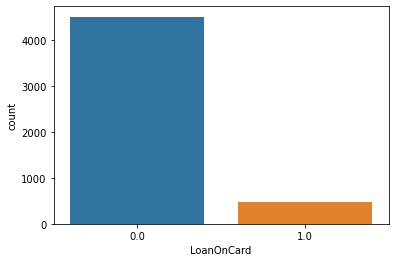

In [193]:
# Visualizing distribution of target variable 'LoanOnCard'

sns.countplot(data['LoanOnCard'])

In [194]:
data['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

#### Conclusion: 
   1. This is the Class imbalance problem.
   2. Out of 5000 there are only 480 loan cases.

#### further plotting the loanOnCard variable with other feature columns in the data

<AxesSubplot:xlabel='Age', ylabel='Mortgage'>

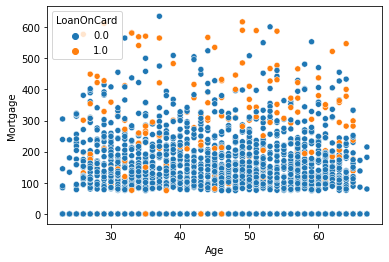

In [195]:
sns.scatterplot(data['Age'], data['Mortgage'], hue=data['LoanOnCard'],palette='tab10')

<AxesSubplot:xlabel='Age', ylabel='CustomerSince'>

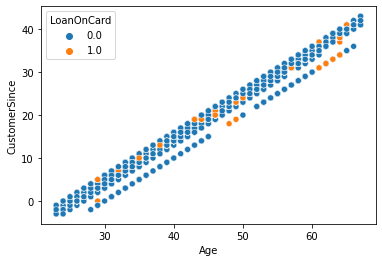

In [196]:

sns.scatterplot(data['Age'], data['CustomerSince'], hue=data['LoanOnCard'], palette='tab10')


<AxesSubplot:xlabel='Age', ylabel='HighestSpend'>

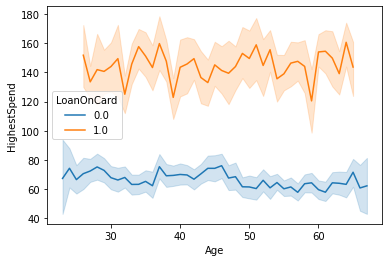

In [197]:

sns.lineplot(data['Age'], data['HighestSpend'], hue=data['LoanOnCard'], palette='tab10')


<AxesSubplot:xlabel='Age', ylabel='MonthlyAverageSpend'>

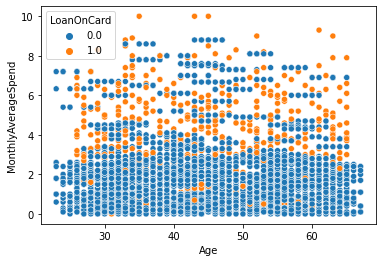

In [198]:

sns.scatterplot(data['Age'], data['MonthlyAverageSpend'], hue=data['LoanOnCard'], palette='tab10' )


<AxesSubplot:>

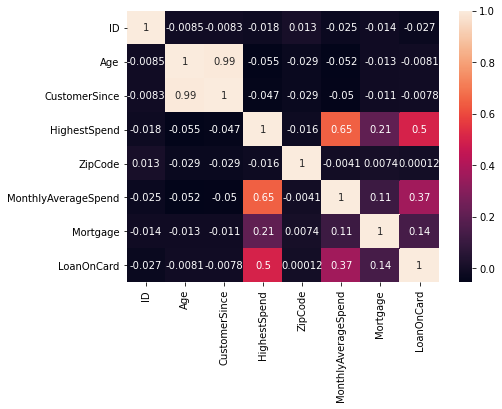

In [199]:
plt.figure(figsize=[7,5])
sns.heatmap(data.corr(), annot=True,)

#### 2.B checking for null values

In [200]:
# checking for null values in the dataset

data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

#### There are 20 null values in the 'LoanOnCard' feature column

In [201]:
# checking percentage of missing values

print("Percentage of missing values:  \n",(data['LoanOnCard'].isnull().sum()/data['LoanOnCard'].count())*100)

Percentage of missing values:  
 0.4016064257028112


#### Imputing missing values and null values

In [202]:
# printing all the 20 rows containing nan in LoanOnCard

d1=data[data['LoanOnCard'].isnull()]

In [203]:
d1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,NaN


In [204]:
d2=data[~data['LoanOnCard'].isnull()]

In [205]:
d2

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
10,11,65,39,105,94710,4,2.4,3,0,0,0,0,0,0.0
11,12,29,5,45,90277,3,0.1,2,0,0,0,1,0,0.0
12,13,48,23,114,93106,2,3.8,3,0,1,0,0,0,0.0
13,14,59,32,40,94920,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [206]:
# training model for this d2 dataset
x1= d2.drop(['ID', 'ZipCode','LoanOnCard'], axis=1)
y1= d2['LoanOnCard']
lr= LogisticRegression()
x1_train, x1_test, y1_train,  y1_test= train_test_split(x1, y1, test_size=0.25, random_state =1)
lr.fit(x1_train, y1_train)

print(lr.score(x1_train, y1_train))


0.9493975903614458


In [207]:
lr.score(x1_test, y1_test)

0.9437751004016064

In [208]:
#lr.predict(d1.drop(['ID', 'ZipCode','LoanOnCard'])

In [211]:
# predicting for missing values
inp= d1.drop(['ID', 'ZipCode','LoanOnCard'], axis=1)
a=lr.predict(inp)

In [212]:
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.])

In [213]:
d1['LoanOnCard']=a

In [214]:
d1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0.0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0.0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0.0
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0.0
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,0.0


In [217]:
pd.concat([d1,d2], axis=0)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [93]:
# predicted values dataframe is :
ab = pd.DataFrame()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    1.0
16    0.0
17    0.0
18    0.0
19    0.0
dtype: float64

In [94]:
# so for 15th index loanOnCard value is 1. 
# we replace nan value with 1 and rest with 0. 
d1.loc[86, 'LoanOnCard']=1
d1

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,NaN
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,NaN
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,NaN
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,NaN
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,NaN


In [95]:
data=pd.concat([d1,d2], axis=0)
data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [96]:
# filling nan values with zero

data.fillna(0, inplace=True)
data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [97]:
# now checking for null values
data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

#### 2.C Checking for unexpected values in the categorical variable 


In [98]:
# we check by using unique function
# There are 6 categorical columns, we check one by one

In [99]:
data['HiddenScore'].unique()

array([4, 3, 1, 2], dtype=int64)

In [100]:
data['Level'].unique()

array([1, 2, 3], dtype=int64)

In [101]:
data['Security'].unique()


array([1, 0], dtype=int64)

In [102]:
data['FixedDepositAccount'].unique()

array([0, 1], dtype=int64)

In [103]:
data['CreditCard'].unique()

array([0, 1], dtype=int64)

In [104]:
data['LoanOnCard'].unique()

array([0., 1.])

In [105]:
data['CustomerSince'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 26, 36, 22, 16,  2, 41, -1, 39,
        5, 23, 32, 30, 14, 18, 21, 28, 31, 11, 20, 35,  6, 25,  7, 12, 37,
       17, 29,  3, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [106]:
# there are -1, -2,-3 values in the column customersince as this is in years. hence cant be negative 
 # so we drop these values from the dataframe

In [107]:
data.drop(data[data['CustomerSince']<0].index, inplace= True)


In [108]:
data['LoanOnCard'].value_counts()

0.0    4467
1.0     481
Name: LoanOnCard, dtype: int64

#### There are no unexpected values in the categorical columns

In [109]:
data.head(20)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0,0.0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0,0.0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,1,0.0
8,9,35,10,81,90089,3,0.6,2,104,0,0,1,0,0.0
79,80,50,26,19,94720,2,0.4,1,118,0,0,1,0,0.0


In [110]:
# sorting index on ascending order basis

data.sort_index(axis=0, ascending=True, inplace=True)

In [111]:
data[data['LoanOnCard']==1].head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,10,34,9,180,93023,1,8.9,3,0,0,0,0,0,1.0
16,17,38,14,130,95010,4,4.7,3,134,0,0,0,0,1.0
18,19,46,21,193,91604,2,8.1,3,0,0,0,0,0,1.0
29,30,38,13,119,94104,1,3.3,2,0,0,1,1,1,1.0
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,0,1.0


### 3. Data Preparation and Model Building

#### 3.A Splitting data into X and Y

In [112]:
X1 = data.drop(['ID', 'ZipCode', 'LoanOnCard'], axis=1)

In [113]:
X1.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [114]:
X1.shape

(4948, 11)

In [115]:
Y1= data['LoanOnCard']

In [116]:
Y1.shape

(4948,)

#### 3.B:

In [117]:
# Splitting data into test and training set

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.25,random_state=1)


#### 3.C:

In [118]:
 
lr= LogisticRegression()

lr.fit(X1_train, Y1_train)


LogisticRegression()

In [119]:
print("What is the Training Accuracy")
print(lr.score(X1_train,Y1_train))
print(" ")
print("What is the Testing Accuracy")
print(lr.score(X1_test,Y1_test))

What is the Training Accuracy
0.9485313931554837
 
What is the Testing Accuracy
0.9417946645109135


In [120]:
predicted = lr.predict(X1_test)

print(confusion_matrix(Y1_test,predicted))

print(classification_report(Y1_test,predicted))

[[1098   18]
 [  54   67]]
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1116
         1.0       0.79      0.55      0.65       121

    accuracy                           0.94      1237
   macro avg       0.87      0.77      0.81      1237
weighted avg       0.94      0.94      0.94      1237



In [121]:
print("Precision score: \n")
print(precision_score(Y1_test,predicted,average='weighted'))
print(" ")
print("Recall score: \n")
print(recall_score(Y1_test,predicted,average='weighted'))
print(" ")
print("f1 score: \n")
print(f1_score(Y1_test,predicted,average='weighted'))

Precision score: 

0.936995934186124
 
Recall score: 

0.9417946645109135
 
f1 score: 

0.9371707085169817


#### 3.E. Balancing the target variable and then building the model

In [122]:
data['LoanOnCard'].value_counts(normalize=True)

0.0    0.902789
1.0    0.097211
Name: LoanOnCard, dtype: float64

#### having loan percentage = 9.72%
#### not having loan = 90.27%

#### balancing target variable 50:50.

#### First we perform sampling using SMOTETomek

In [123]:
#!pip install imblearn
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state=42)
x11, y11  = smk.fit_resample(X1, Y1)


In [124]:
x11.shape

(8880, 11)

In [125]:
y11.value_counts(normalize=True)


0.0    0.5
1.0    0.5
Name: LoanOnCard, dtype: float64

#### Target variable is 50:50 distributed.

In [126]:
# now we train the model on this balanced data

In [127]:
X1blncd_train, X1blncd_test, Y1blncd_train, Y1blncd_test = train_test_split(x11, y11, test_size=0.25,random_state=1)

# we apply standardscaler function on X1_train set 
lr= LogisticRegression()
#X1train_scaled= sc.fit(X1_train)
#X1test_scaled= sc.fit(X1_test)
lr.fit(X1blncd_train, Y1blncd_train)

print("What is the Training Accuracy")
print(lr.score(X1blncd_train,Y1blncd_train))
print(" ")
print("What is the Testing Accuracy")
print(lr.score(X1blncd_test,Y1blncd_test))

What is the Training Accuracy
0.8839339339339339
 
What is the Testing Accuracy
0.8738738738738738


In [128]:
predict = lr.predict(X1blncd_test)

print(confusion_matrix(Y1blncd_test,predict))

print(classification_report(Y1blncd_test,predict))

[[954 146]
 [134 986]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1100
         1.0       0.87      0.88      0.88      1120

    accuracy                           0.87      2220
   macro avg       0.87      0.87      0.87      2220
weighted avg       0.87      0.87      0.87      2220



In [129]:
print("Precision score: \n")
print(precision_score(Y1blncd_test,predict,average='weighted'))
print(" ")
print("Recall score: \n")
print(recall_score(Y1blncd_test,predict,average='weighted'))
print(" ")
print("f1 score: \n")
print(f1_score(Y1blncd_test,predict,average='weighted'))

Precision score: 

0.8739052981998835
 
Recall score: 

0.8738738738738738
 
f1 score: 

0.8738640446194325


#### Now we perform oversampling using Randomoversampler

In [130]:
from imblearn.over_sampling import RandomOverSampler

In [131]:
os= RandomOverSampler(random_state=10)

In [132]:
x_train_res, y_train_res= os.fit_resample(X1,Y1)

In [133]:
x_train_res.shape, y_train_res.shape

((8934, 11), (8934,))

In [134]:
# checking distribution of target variable

y_train_res.value_counts()

0.0    4467
1.0    4467
Name: LoanOnCard, dtype: int64

In [135]:
# now we train model

In [136]:
x1res_train, x1res_test, y1res_train, y1res_test = train_test_split(x_train_res, y_train_res, test_size=0.25,random_state=1)

# we apply standardscaler function on X1_train set 
lr= LogisticRegression()
lr.fit(x1res_train, y1res_train)

print("What is the Training Accuracy")
print(lr.score(x1res_train,y1res_train))
print(" ")
print("What is the Testing Accuracy")
print(lr.score(x1res_test,y1res_test))

What is the Training Accuracy
0.8928358208955224
 
What is the Testing Accuracy
0.8863025962399284


In [137]:
pred = lr.predict(x1res_test)

print(confusion_matrix(y1res_test,pred))

print(classification_report(y1res_test,pred))

[[ 973  132]
 [ 122 1007]]
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      1105
         1.0       0.88      0.89      0.89      1129

    accuracy                           0.89      2234
   macro avg       0.89      0.89      0.89      2234
weighted avg       0.89      0.89      0.89      2234



In [138]:
print("Precision score: \n")
print(precision_score(y1res_test,pred,average='weighted'))
print(" ")
print("Recall score: \n")
print(recall_score(y1res_test,pred,average='weighted'))
print(" ")
print("f1 score: \n")
print(f1_score(y1res_test,pred,average='weighted'))

Precision score: 

0.8863226302930094
 
Recall score: 

0.8863025962399284
 
f1 score: 

0.886294848701593


### Insights of the above methods perform :

#### Base Model- 
1. The training and testing accuracy is very high as it is 94.85% , 94.17%.
2. This means it is predicting most of the cases as not loanOnCard because of imbalanced dataset.

#### Balanced Model-
  After performing oversampling and SMOTETomek, data is balanced. 

1. It is better than the base model as the accuracy is somewhat near to 89%.
2. It takes into account equal amount of data in target variable. 
3. It is more precise in predicting correct values.


### 4. Performance Improvement

#### 4.A: Building base model by SVM 

In [139]:
from sklearn import svm

In [140]:
xsvm_train, xsvm_test, ysvm_train, ysvm_test = train_test_split(X1, Y1, test_size=0.25,random_state=1)

In [141]:
clf = svm.SVC(gamma=0.025, C=3) 

In [142]:
clf.fit(xsvm_train , ysvm_train)
ysvm_pred = clf.predict(xsvm_test)

In [143]:
print("SVM accuracy score for testing data is : ",accuracy_score(ysvm_test , ysvm_pred)*100 )

SVM accuracy score for testing data is :  91.75424413904608


In [144]:
print(confusion_matrix(ysvm_test,ysvm_pred))

[[1099   17]
 [  85   36]]


In [145]:
print(classification_report(ysvm_test , ysvm_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1116
         1.0       0.68      0.30      0.41       121

    accuracy                           0.92      1237
   macro avg       0.80      0.64      0.68      1237
weighted avg       0.90      0.92      0.90      1237



In [146]:
print("Precision score: \n")
print(precision_score(ysvm_test,ysvm_pred,average='weighted'))
print(" ")
print("Recall score: \n")
print(recall_score(ysvm_test,ysvm_pred,average='weighted'))
print(" ")
print("f1 score: \n")
print(f1_score(ysvm_test,ysvm_pred,average='weighted'))

Precision score: 

0.9038564559434437
 
Recall score: 

0.9175424413904608
 
f1 score: 

0.9026489827034745


#### Tuning hyperparameters for SVM 

In [147]:
# we make a dictionary of all the parameters

param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.25,0.1, 0.01], }

In [148]:

grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid.fit(xsvm_train,ysvm_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   1.5s
[CV] END .....................................C=0.1, gamma=1; total time=   1.3s
[CV] END .....................................C=0.1, gamma=1; total time=   1.4s
[CV] END .....................................C=0.1, gamma=1; total time=   2.2s
[CV] END .....................................C=0.1, gamma=1; total time=   1.2s
[CV] END ..................................C=0.1, gamma=0.25; total time=   1.4s
[CV] END ..................................C=0.1, gamma=0.25; total time=   1.2s
[CV] END ..................................C=0.1, gamma=0.25; total time=   1.2s
[CV] END ..................................C=0.1, gamma=0.25; total time=   1.7s
[CV] END ..................................C=0.1, gamma=0.25; total time=   1.2s
[CV] END ...................................C=0.1, gamma=0.1; total time=   1.0s
[CV] END ...................................C=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.25, 0.1, 0.01]},
             verbose=2)

In [149]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.01)


### So, the best hyperparameters for SVM models are:

#### C= 10 & gamma=0.01

#### We tune ,model for c= 10 and gamma=0.01

In [150]:
clf1 = svm.SVC(gamma=0.01, C=10) 
clf1.fit(xsvm_train , ysvm_train)
ysvm_prednew = clf1.predict(xsvm_test)

In [151]:
print("SVM accuracy after hypertuning for testing data is : ",accuracy_score(ysvm_test , ysvm_prednew)*100 )

SVM accuracy after hypertuning for testing data is :  93.37105901374294


In [152]:
print(confusion_matrix(ysvm_test,ysvm_prednew))

[[1101   15]
 [  67   54]]


In [153]:
print(classification_report(ysvm_test , ysvm_prednew))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1116
         1.0       0.78      0.45      0.57       121

    accuracy                           0.93      1237
   macro avg       0.86      0.72      0.77      1237
weighted avg       0.93      0.93      0.93      1237



In [154]:
print("Precision score: \n")
print(precision_score(ysvm_test,ysvm_prednew,average='weighted'))
print(" ")
print("Recall score: \n")
print(recall_score(ysvm_test,ysvm_prednew,average='weighted'))
print(" ")
print("f1 score: \n")
print(f1_score(ysvm_test,ysvm_prednew,average='weighted'))

Precision score: 

0.9269834509993871
 
Recall score: 

0.9337105901374293
 
f1 score: 

0.9253940157283644


#### Improvement Achieved:
 
 1. Before hypertuning:
   
    Testing accuracy = 91.75%
    Precision score = 0.9038
    
    
 2. After hypertuning:
 
    Testing accuracy = 93.371%
    Precision score = 0.926
    
 Conclusion: There is slight improvement in accuracy score and precision score after hypertuning.
 

#### Building base model using KNN 

In [155]:
xknn_train, xknn_test, yknn_train, yknn_test = train_test_split(X1, Y1, test_size=0.25,random_state=1)

In [156]:
knn= KNeighborsClassifier(n_neighbors=5)

In [157]:
knn.fit(xknn_train, yknn_train)

print("Training Accuracy is: ", knn.score(xknn_train,yknn_train) )

print(" ")

print("Testing Accuracy is: ", knn.score(xknn_test,yknn_test))


Training Accuracy is:  0.9415251953651307
 
Testing Accuracy is:  0.904607922392886


In [158]:
test_predict = knn.predict(xknn_test)

# Printing performance metrics for test data
print("Confusion matrix for testing set is: \n")
print(confusion_matrix(yknn_test,test_predict))
print(" ")
print("Classification report for testing set is: \n")
print(classification_report(yknn_test,test_predict))

Confusion matrix for testing set is: 

[[1079   37]
 [  81   40]]
 
Classification report for testing set is: 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1116
         1.0       0.52      0.33      0.40       121

    accuracy                           0.90      1237
   macro avg       0.72      0.65      0.68      1237
weighted avg       0.89      0.90      0.89      1237



In [159]:
print("Precision score before hypertuning:\n")
print(precision_score(yknn_test,test_predict,average="weighted"))

Precision score before hypertuning:

0.8899996415927617


#### Tuning hyperparameters for better model performance


In [160]:
# listing hyperparameters to tune
# converting these to dictionary

hyperparameter= [{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'p': [1,2]}]

# making model
clf2= GridSearchCV(knn,hyperparameter, cv=10)
clf2.fit(xknn_train, yknn_train)

#getting the required results 

print(clf2.best_score_)
print(clf2.best_params_)
print(clf2.best_estimator_)

0.9294010665739212
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


#### Best hyperparameters are:
 1. n_neighbors = 3
 2. p=1
 3. weights= distance 

In [161]:
# Now we fit the hypertune model

knn= KNeighborsClassifier(n_neighbors=3,p=1, )
knn.fit(xknn_train, yknn_train)

print("Training Accuracy is: ", knn.score(xknn_train,yknn_train) )

print(" ")

print("Testing Accuracy is: ", knn.score(xknn_test,yknn_test))

Training Accuracy is:  0.9620048504446241
 
Testing Accuracy is:  0.9191592562651576


In [162]:
test_predn = knn.predict(xknn_test)

# Printing performance metrics for test data
print("Confusion matrix for testing set is: \n")
print(confusion_matrix(yknn_test,test_predn))
print(" ")
print("Classification report for testing set is: \n")
print(classification_report(yknn_test,test_predn))

Confusion matrix for testing set is: 

[[1086   30]
 [  70   51]]
 
Classification report for testing set is: 

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1116
         1.0       0.63      0.42      0.50       121

    accuracy                           0.92      1237
   macro avg       0.78      0.70      0.73      1237
weighted avg       0.91      0.92      0.91      1237



In [163]:
print("Precision score after hypertuning:\n")
print(precision_score(yknn_test,test_predn,average="weighted"))

Precision score after hypertuning:

0.9091409300839974


#### Improvements from base to final model

 1. Testing Accuracy before hypertuning: 90.4%
    
    Testing precision score before hypertuning: 0.8899
    
2. Testing accuracy after hypertuning: 91.91%
    
    Testing precision score after hypertuning: 0.9091
     
 there is slight improvement in model evaluation metrics after hypertuning.